# Unit 1 Homework

In [19]:
#预编译
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

# 1 预备知识

## 1.1 不同自由度下的t分布图像

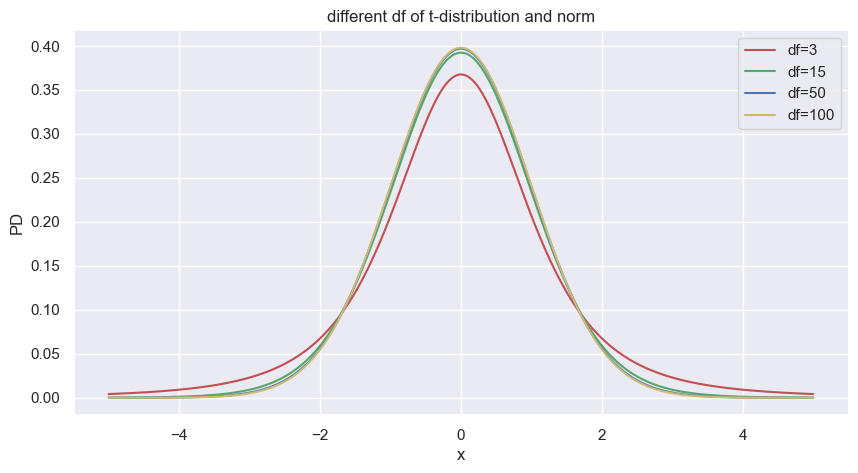

In [20]:
x = np.linspace(-5,5,1000)    #确定x范围
#不同自由度t分布的一些参数
dfs = [3,15,50,100] 
clrs = ["r","g","b","y"]
labels = ["df=3","df=15","df=50","df=100"]

for df,color,label in zip(dfs,clrs,labels):
    y = stats.t.pdf(x,df)                         #令y为x关于t分布的pdf函数
    plt.plot(x,y,color,label=label)               #画图
#图像细节
plt.title("different df of t-distribution and norm")
plt.xlabel("x")
plt.ylabel("PD")
plt.legend()
plt.show()

发现df=50,df=100,norm三条曲线非常接近，这是正常的

## 1.2 不同尝试次数下的二项分布成功概率图像

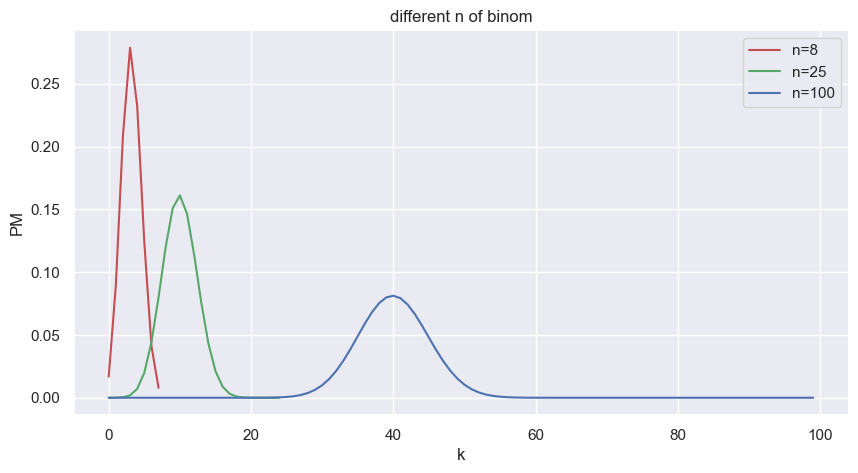

In [21]:
#参数设置
nums = [8,25,100]
p = 0.4
clrs = ["r","g","b"]
labels = ["n=8","n=25","n=100"]

for num,clr,label in zip(nums,clrs,labels):
    k = np.arange(0,num)                     #确定k取值
    y = stats.binom.pmf(k,num,p)             #确定y
    plt.plot(k,y,clr,label=label)
#图像细节
plt.title("different n of binom")
plt.xlabel("k")
plt.ylabel("PM")
plt.legend()
plt.show()

## 1.3 在1.1和1.2图像中增加正态曲线

查资料得知，对于$t(n)$,有
$$\mu=E(t(n))=0$$
$$\sigma^2=D(t(n))=\frac{n}{n-2}$$
故对$t(100)$而言，有
$$\mu=0$$
$$\sigma^2=1.02$$
即需要添加$N(0,1.02^2)$

### 在1.1中添加

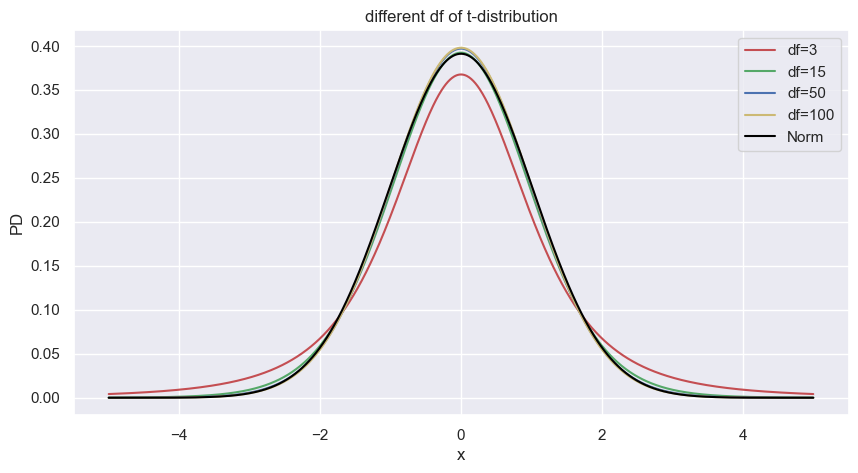

In [22]:
x = np.linspace(-5,5,1000)

dfs = [3,15,50,100]
clrs = ["r","g","b","y"]
labels = ["df=3","df=15","df=50","df=100"]

for df,color,label in zip(dfs,clrs,labels):
    y = stats.t.pdf(x,df)
    plt.plot(x,y,color,label=label)
    
y = stats.norm.pdf(x,0,1.02)              #增加的语句
plt.plot(x,y,"black",label="Norm")

plt.title("different df of t-distribution")
plt.xlabel("x")
plt.ylabel("PD")
plt.legend()
plt.show()

### 在1.2中添加

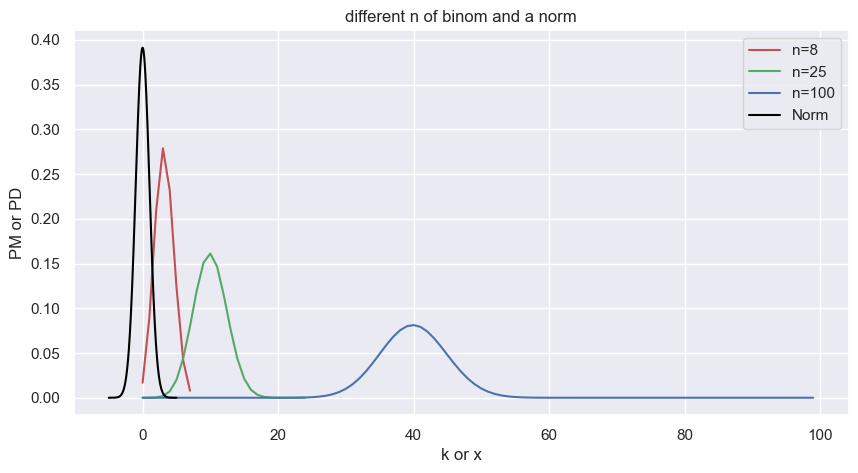

In [23]:
nums = [8,25,100]
p = 0.4
clrs = ["r","g","b"]
labels = ["n=8","n=25","n=100"]

for num,clr,label in zip(nums,clrs,labels):
    k = np.arange(0,num)
    y = stats.binom.pmf(k,num,p)
    plt.plot(k,y,clr,label=label)
    
x = np.linspace(-5,5,1000)          #增加的语句，用于生成norm
y = stats.norm.pdf(x,0,1.02)
plt.plot(x,y,"black",label="Norm")

plt.title("different n of binom and a norm")
plt.xlabel("k or x")
plt.ylabel("PM or PD")
plt.legend()
plt.show()

# 2 可视化

## 2.1 男性女性不同数据对比

In [24]:
#预设置
sns.set_style("darkgrid")                        #设置背景
sns.set(rc={"figure.figsize":(10,5)})            #设置画布大小
data = pd.read_csv("C:/Users/25167\Desktop\StudentData.csv")  #读取文件

### 2.1.1 身高

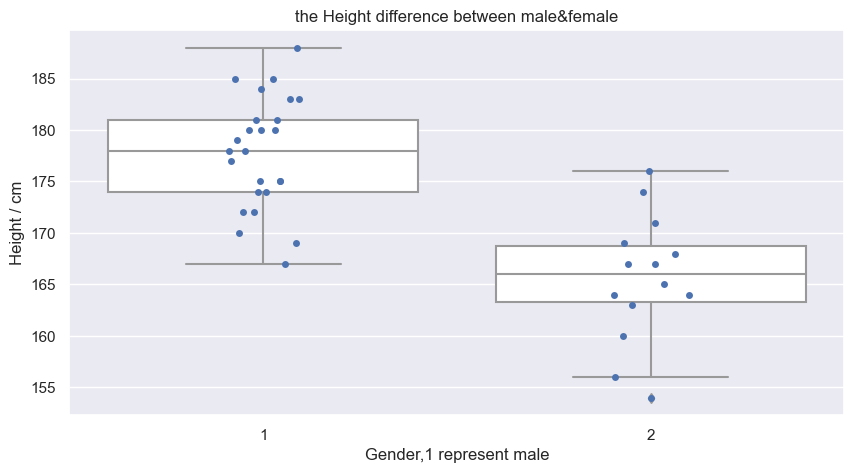

In [25]:
sns.boxplot(y="Height",data=data,color="w",x="Gender")
sns.stripplot(y="Height",data=data,color="b",x="Gender")
plt.xlabel("Gender,1 represent male")
plt.ylabel("Height / cm")
plt.title("the Height difference between male&female")
plt.show()

### 2.1.2 体重

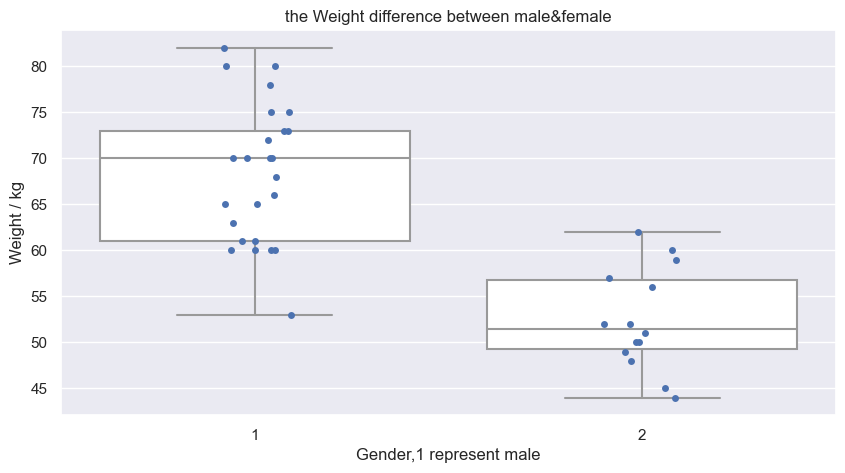

In [26]:
sns.boxplot(x="Gender", y="Weight", color="w", data=data)
sns.stripplot(x="Gender", y="Weight", color="b", data=data)
plt.xlabel("Gender,1 represent male")
plt.ylabel("Weight / kg")
plt.title("the Weight difference between male&female")
plt.show()

### 2.1.3 运动时间

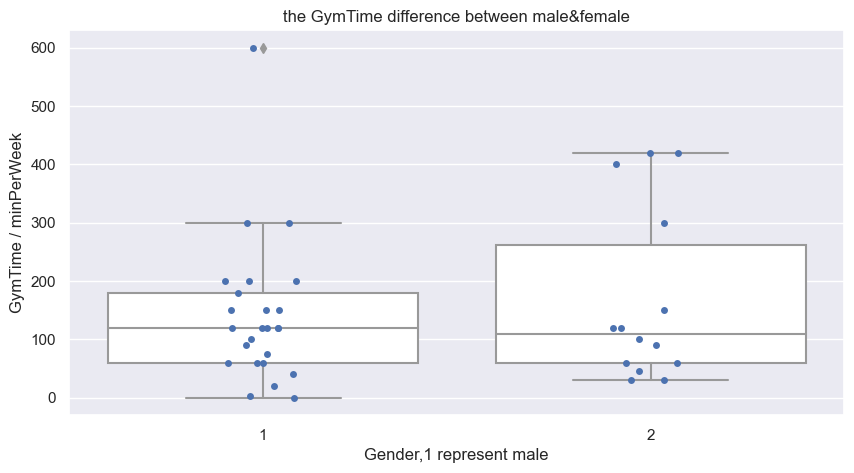

In [27]:
sns.boxplot(x="Gender", y="GymTime", color="w", data=data)
sns.stripplot(x="Gender", y="GymTime", color="b", data=data)
plt.xlabel("Gender,1 represent male")
plt.ylabel("GymTime / minPerWeek")
plt.title("the GymTime difference between male&female")
plt.show()

## 2.2 相关系数热图

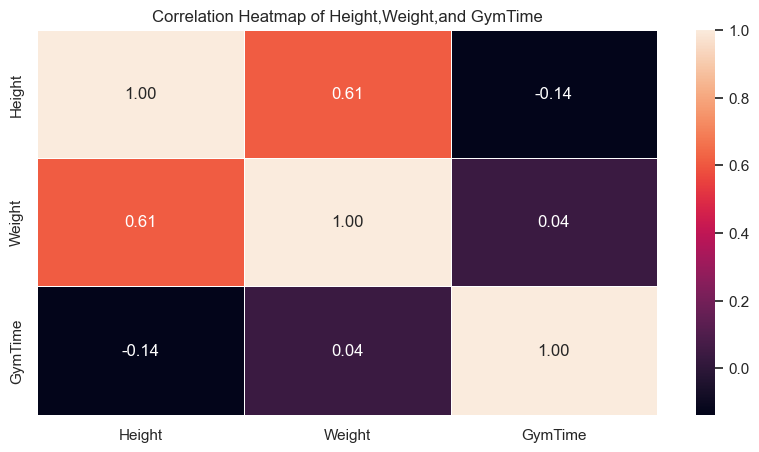

In [28]:
dataNeeded = data.drop(["ID","Gender"],axis=1)                  #去除不需要的数据，传递给新的datNeeded
sns.heatmap(dataNeeded.corr(),annot=True,fmt=".2f",linewidths=0.5)  #用corr求相关系数后画热图
plt.title("Correlation Heatmap of Height,Weight,and GymTime")      #命名
plt.show()